In [70]:
import sys
sys.path.append('../')
# from src.kaggle_dataset_downloader import download_kaggle_dataset
# download_kaggle_dataset("abrambeyer/openintro-possum", "./data")

Can we use total length to predict a possum's head length?<br>
Which possum body dimensions are most correlated with age and sex?<br>
Can we classify a possum's sex by its body dimensions and location? <br>
Can we predict a possum's trapping location from its body dimensions? <br>

### <font color = 'blue'>Features </font><br>
case<br>
site of recording<br>
population area<br>
sex<br>
age<br>
head length<br>
skull width<br>
total length<br>
tail length<br>
foot length<br>
ear conch length<br>
eye size<br>
chest girt<br>
belly girt<br>


- Can we use total length to predict a possum's head length?<br>
- Which possum body dimensions are most correlated with age and sex?<br>
- Can we classify a possum's sex by its body dimensions and location?<br>
- Can we predict a possum's trapping location from its body dimensions?<br>



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import gaussian_kde
from itertools import combinations
from scipy import stats

**Importing possum dataset and inspecting the structure, dtypes, missing values and statistical features**

In [72]:
df = pd.read_csv('./data/possum.csv')

In [73]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [74]:
df.Pop.value_counts()

Pop
other    58
Vic      46
Name: count, dtype: int64

In [75]:
df.sex.value_counts()

sex
m    61
f    43
Name: count, dtype: int64

**case column is just numbers to cound the enteries and we can drop it**

In [76]:
df.drop('case', axis=1, inplace=True)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      104 non-null    int64  
 1   Pop       104 non-null    object 
 2   sex       104 non-null    object 
 3   age       102 non-null    float64
 4   hdlngth   104 non-null    float64
 5   skullw    104 non-null    float64
 6   totlngth  104 non-null    float64
 7   taill     104 non-null    float64
 8   footlgth  103 non-null    float64
 9   earconch  104 non-null    float64
 10  eye       104 non-null    float64
 11  chest     104 non-null    float64
 12  belly     104 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.7+ KB


**104 rows and 14 features (104 , 14). datatypes are consisted of object, int and float. we can also see that we have a few missing values**

In [78]:
df.isnull().sum()

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [79]:
df.select_dtypes(include=['float']).describe()

,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


**age and eye have lower range and std compared to other features. for the missing values we can simply fill them with mean values for each feature (age = 3.83 , footlgth = 68.45)**

In [80]:
df.fillna(df['age'].mean(), inplace=True)
df.fillna(df['footlgth'].mean(), inplace=True)

In [81]:
df.columns

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [82]:
numerical_features = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
def boxplot_per_feature(n, m , dataset):
    fig, axes = plt.subplots(n, m, figsize=(10, 15))
    ax = axes.flatten()
    # Plot each feature against target
    for i, feature in enumerate(numerical_features):
        ax[i].boxplot(dataset[feature])
        ax[i].set_xticklabels([feature], color = 'red')  
        ax[i].set_ylabel('ranges')
        ax[i].set_title(f'{feature} Boxplot')
    # Hide any empty subplots
    for i in range(len(dataset), len(ax)):
        ax[i].set_visible(False)
    plt.tight_layout()
    plt.show()



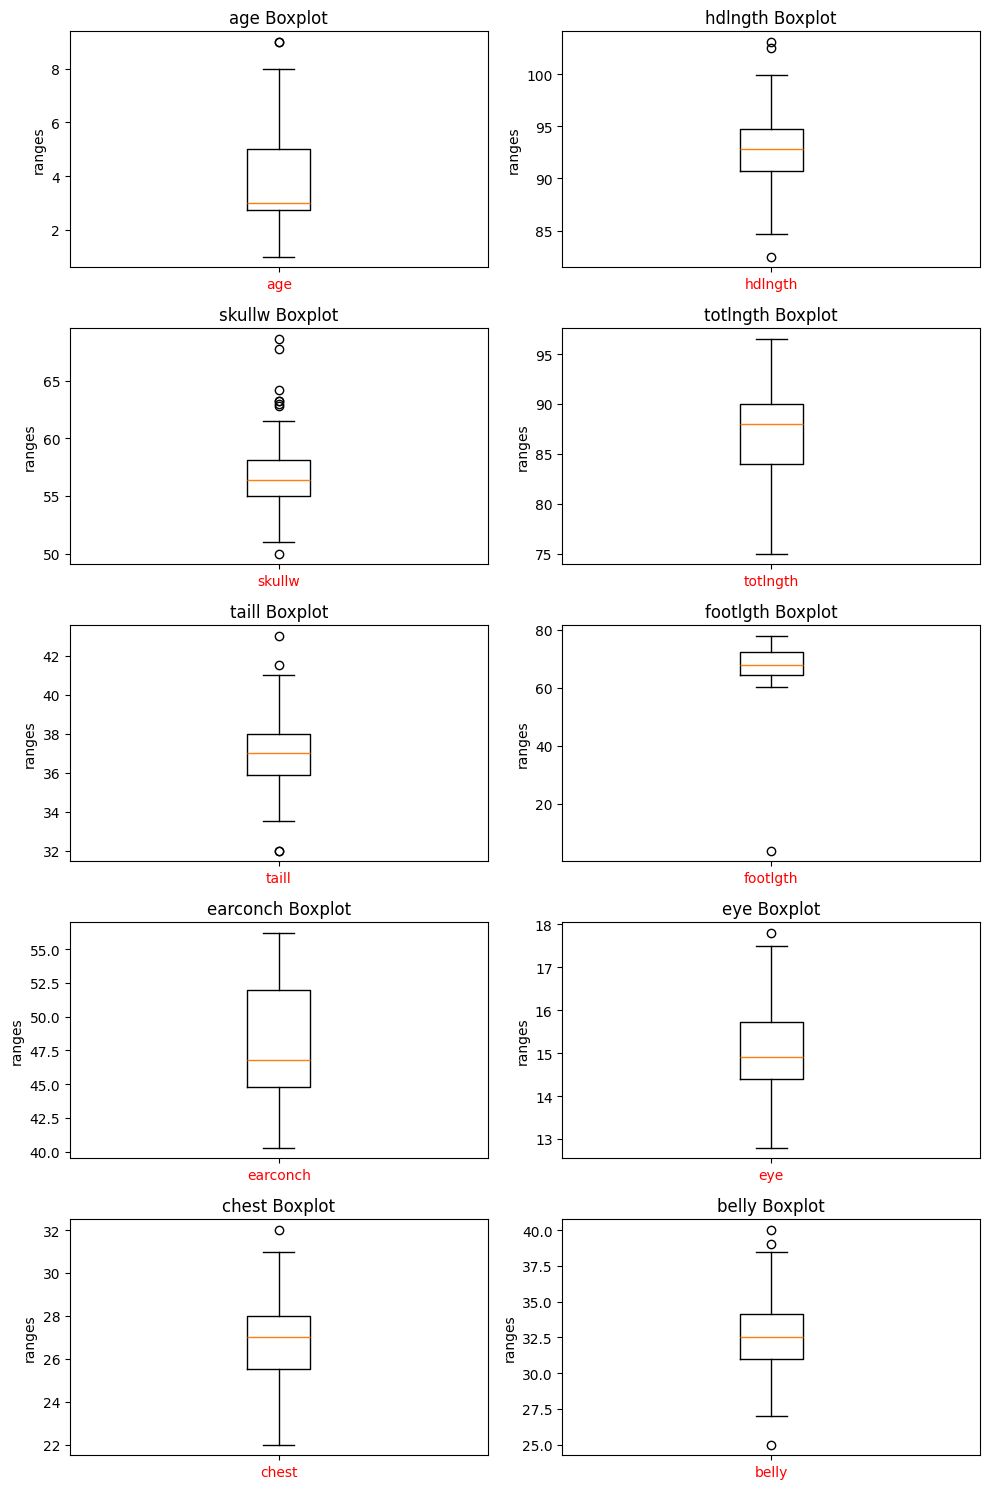

In [83]:
boxplot_per_feature(5, 2 ,df.select_dtypes(include=['float', 'int']))

In [84]:
numerical_features = ['age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']
def violon_plot(n, m , dataset):
    fig, axes = plt.subplots(n, m, figsize=(10, 15))
    ax = axes.flatten()
    for i, feature in enumerate(numerical_features):
        ax[i].hist(dataset[feature], bins = 25, edgecolor ='black')
        ax[i].set_ylabel('ranges')
        ax[i].set_title(f'{feature} Boxplot')
    for i in range(len(dataset), len(ax)):
        ax[i].set_visible(False)
    plt.tight_layout()
    plt.show()

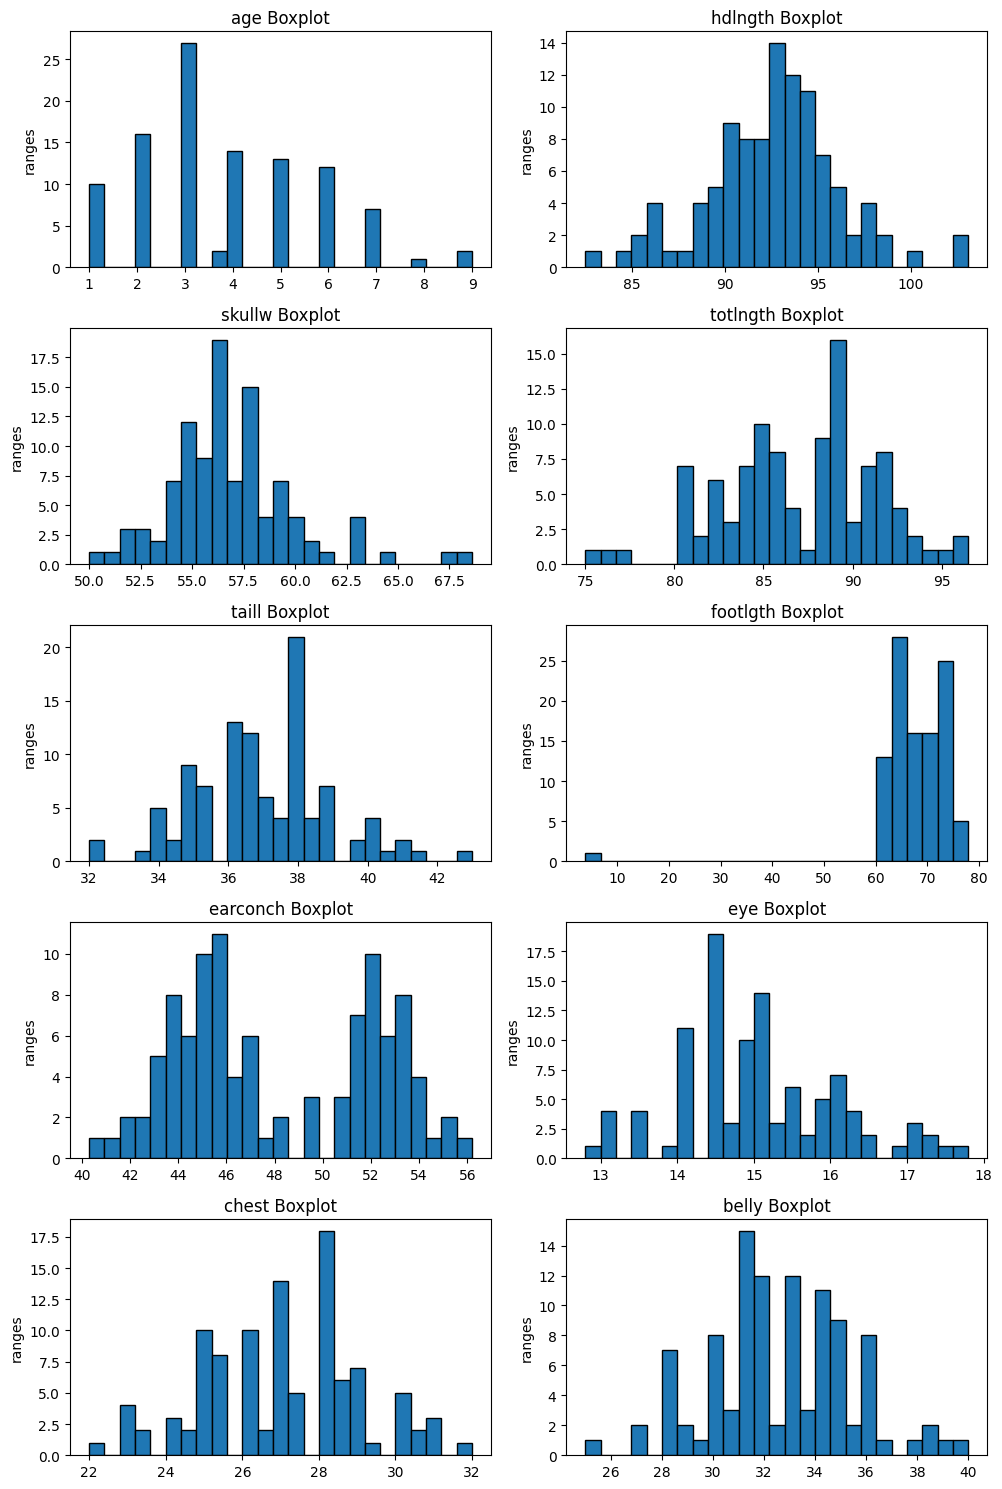

In [85]:
violon_plot(5, 2 ,df.select_dtypes(include=['float', 'int']))

**My assumtion is that most of the distributions makes sense except for the very small footlenght which looks to be fully out of range. i will drop this row because it seems wrong**

In [86]:
df.iloc[40]

site               2
Pop              Vic
sex                f
age              5.0
hdlngth         88.4
skullw          57.0
totlngth        83.0
taill           36.5
footlgth    3.833333
earconch        40.3
eye             15.9
chest           27.0
belly           30.5
Name: 40, dtype: object

In [87]:
df.drop(40, axis =0, inplace=True)

**seperating males and females data and comparing some of the features**

male poplution comparison of totlngth and hdlngth <br>
R2 value shows how well the line fits (1.0 = perfect fit, 0.0 = no correlation)

In [88]:
male_pop = df[df['sex'] == 'm']
female_pop = df[df['sex'] == 'f']

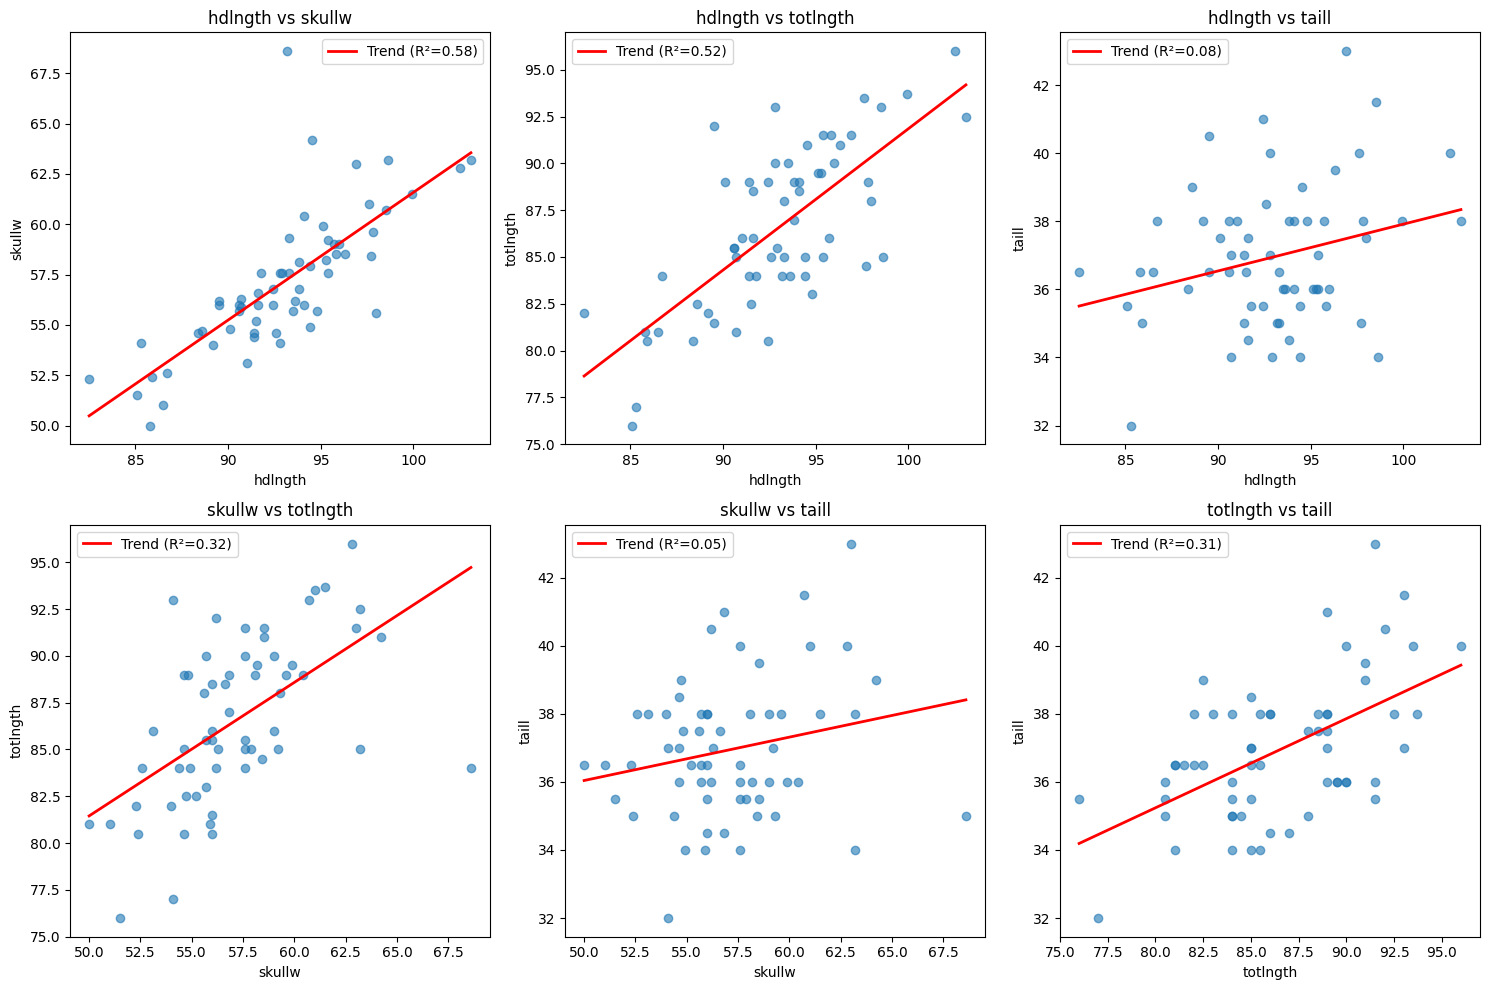

In [89]:
features = ['hdlngth', 'skullw', 'totlngth', 'taill']
pairs = list(combinations(features, 2))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.flatten()

for i, (feature_x, feature_y) in enumerate(pairs):
    ax[i].scatter(male_pop[feature_x], male_pop[feature_y], alpha=0.6)
    
    # Add regression/trend line
    slope, intercept, r_value, _, _ = stats.linregress(male_pop[feature_x], male_pop[feature_y])
    line_x = np.linspace(male_pop[feature_x].min(), male_pop[feature_x].max(), 100)
    line_y = slope * line_x + intercept
    ax[i].plot(line_x, line_y, 'r-', linewidth=2, label=f'Trend (R²={r_value**2:.2f})')
    
    # # Mean lines
    # ax[i].axhline(female_pop[feature_y].mean(), color='green', linestyle='--', alpha=0.5, label='Mean Y')
    # ax[i].axvline(female_pop[feature_x].mean(), color='blue', linestyle='--', alpha=0.5, label='Mean X')
    
    ax[i].set_xlabel(feature_x)
    ax[i].set_ylabel(feature_y)
    ax[i].set_title(f'{feature_x} vs {feature_y}')
    ax[i].legend()

plt.tight_layout()
plt.show()

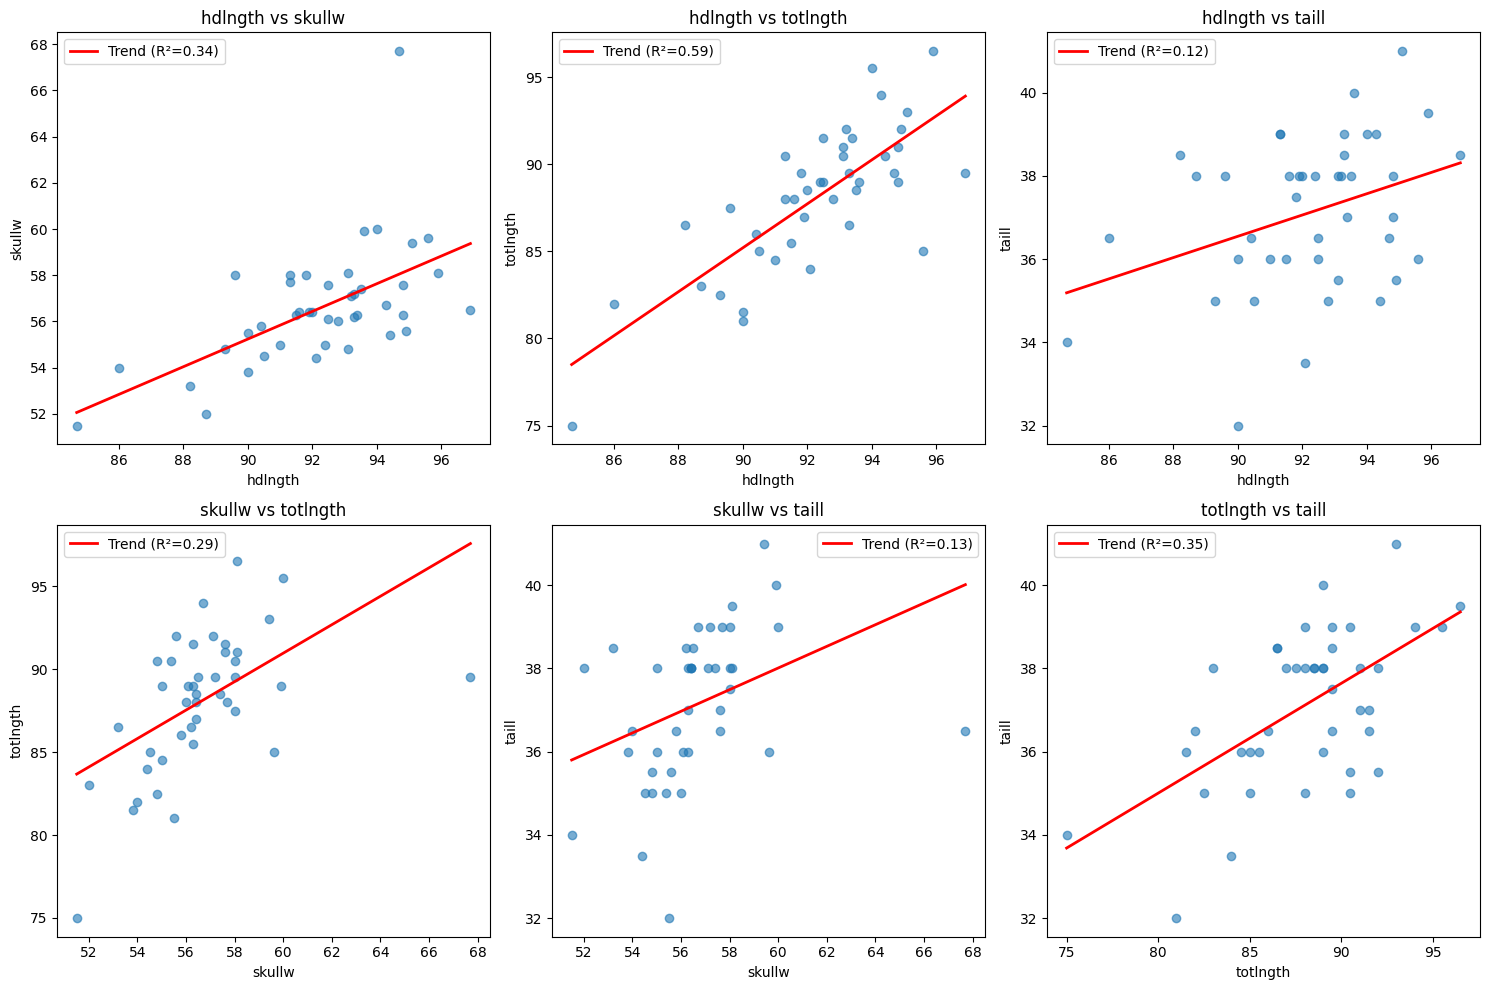

In [90]:
features = ['hdlngth', 'skullw', 'totlngth', 'taill']
pairs = list(combinations(features, 2))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.flatten()

for i, (feature_x, feature_y) in enumerate(pairs):
    ax[i].scatter(female_pop[feature_x], female_pop[feature_y], alpha=0.6)
    
    # Add regression/trend line
    slope, intercept, r_value, _, _ = stats.linregress(female_pop[feature_x], female_pop[feature_y])
    line_x = np.linspace(female_pop[feature_x].min(), female_pop[feature_x].max(), 100)
    line_y = slope * line_x + intercept
    ax[i].plot(line_x, line_y, 'r-', linewidth=2, label=f'Trend (R²={r_value**2:.2f})')
    
    # # Mean lines
    # ax[i].axhline(female_pop[feature_y].mean(), color='green', linestyle='--', alpha=0.5, label='Mean Y')
    # ax[i].axvline(female_pop[feature_x].mean(), color='blue', linestyle='--', alpha=0.5, label='Mean X')
    
    ax[i].set_xlabel(feature_x)
    ax[i].set_ylabel(feature_y)
    ax[i].set_title(f'{feature_x} vs {feature_y}')
    ax[i].legend()

plt.tight_layout()
plt.show()

In [91]:
vic_pop = df[df['Pop'] == 'Vic']
other_pop = df[df['Pop'] == 'other']

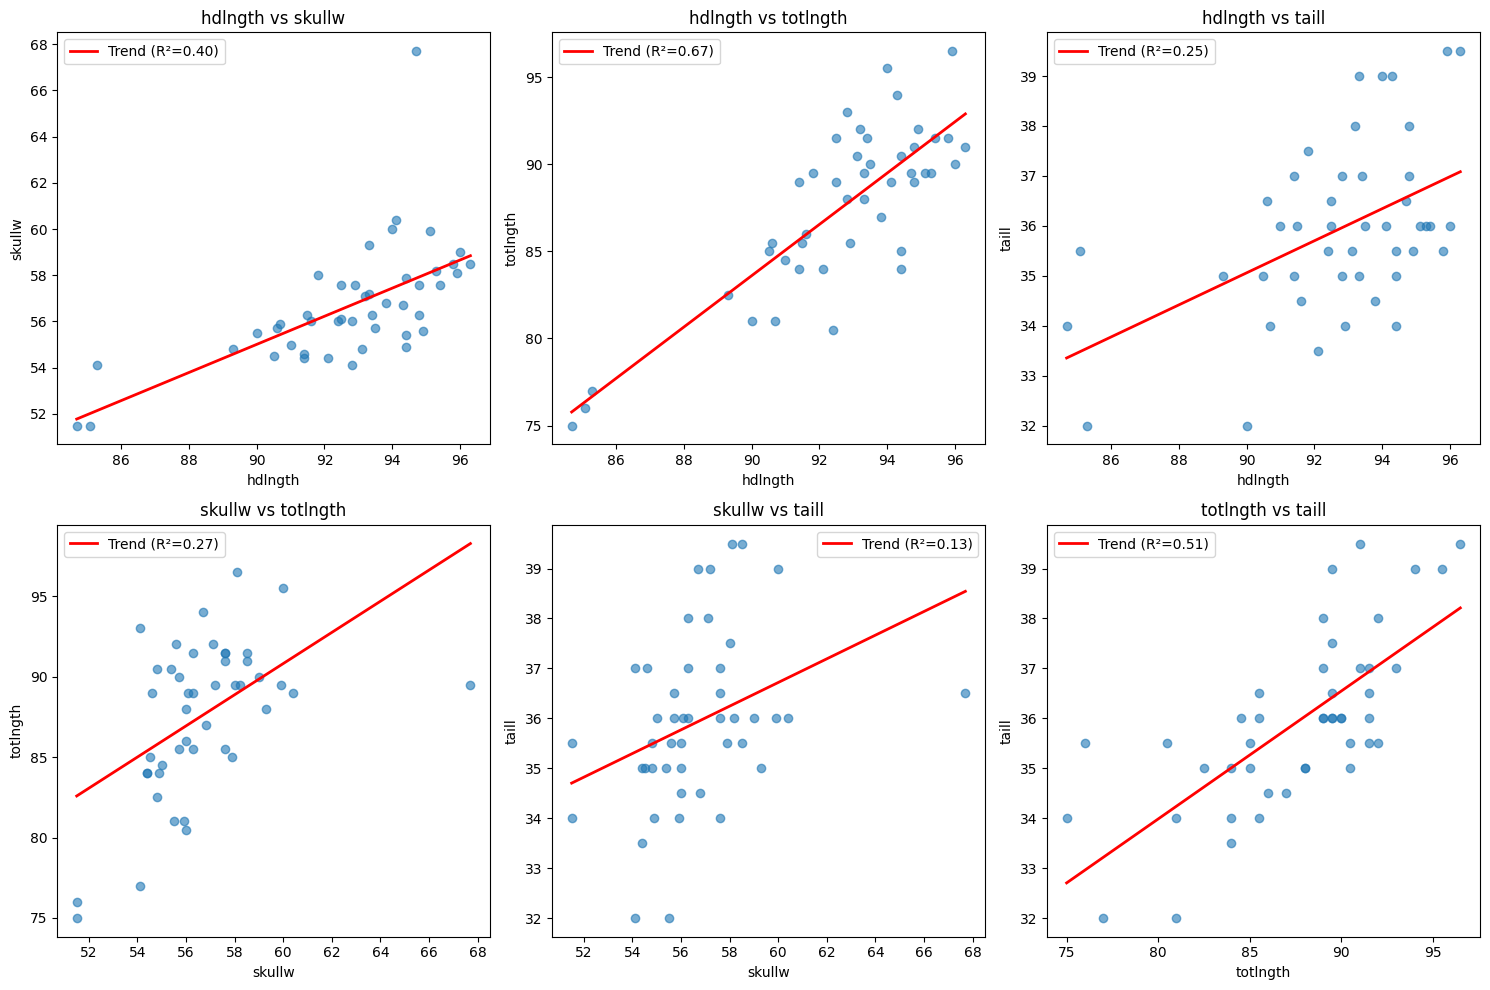

In [92]:
features = ['hdlngth', 'skullw', 'totlngth', 'taill']
pairs = list(combinations(features, 2))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.flatten()

for i, (feature_x, feature_y) in enumerate(pairs):
    ax[i].scatter(vic_pop[feature_x], vic_pop[feature_y], alpha=0.6)
    
    # Add regression/trend line
    slope, intercept, r_value, _, _ = stats.linregress(vic_pop[feature_x], vic_pop[feature_y])
    line_x = np.linspace(vic_pop[feature_x].min(), vic_pop[feature_x].max(), 100)
    line_y = slope * line_x + intercept
    ax[i].plot(line_x, line_y, 'r-', linewidth=2, label=f'Trend (R²={r_value**2:.2f})')
    
    # # Mean lines
    # ax[i].axhline(female_pop[feature_y].mean(), color='green', linestyle='--', alpha=0.5, label='Mean Y')
    # ax[i].axvline(female_pop[feature_x].mean(), color='blue', linestyle='--', alpha=0.5, label='Mean X')
    
    ax[i].set_xlabel(feature_x)
    ax[i].set_ylabel(feature_y)
    ax[i].set_title(f'{feature_x} vs {feature_y}')
    ax[i].legend()

plt.tight_layout()
plt.show()

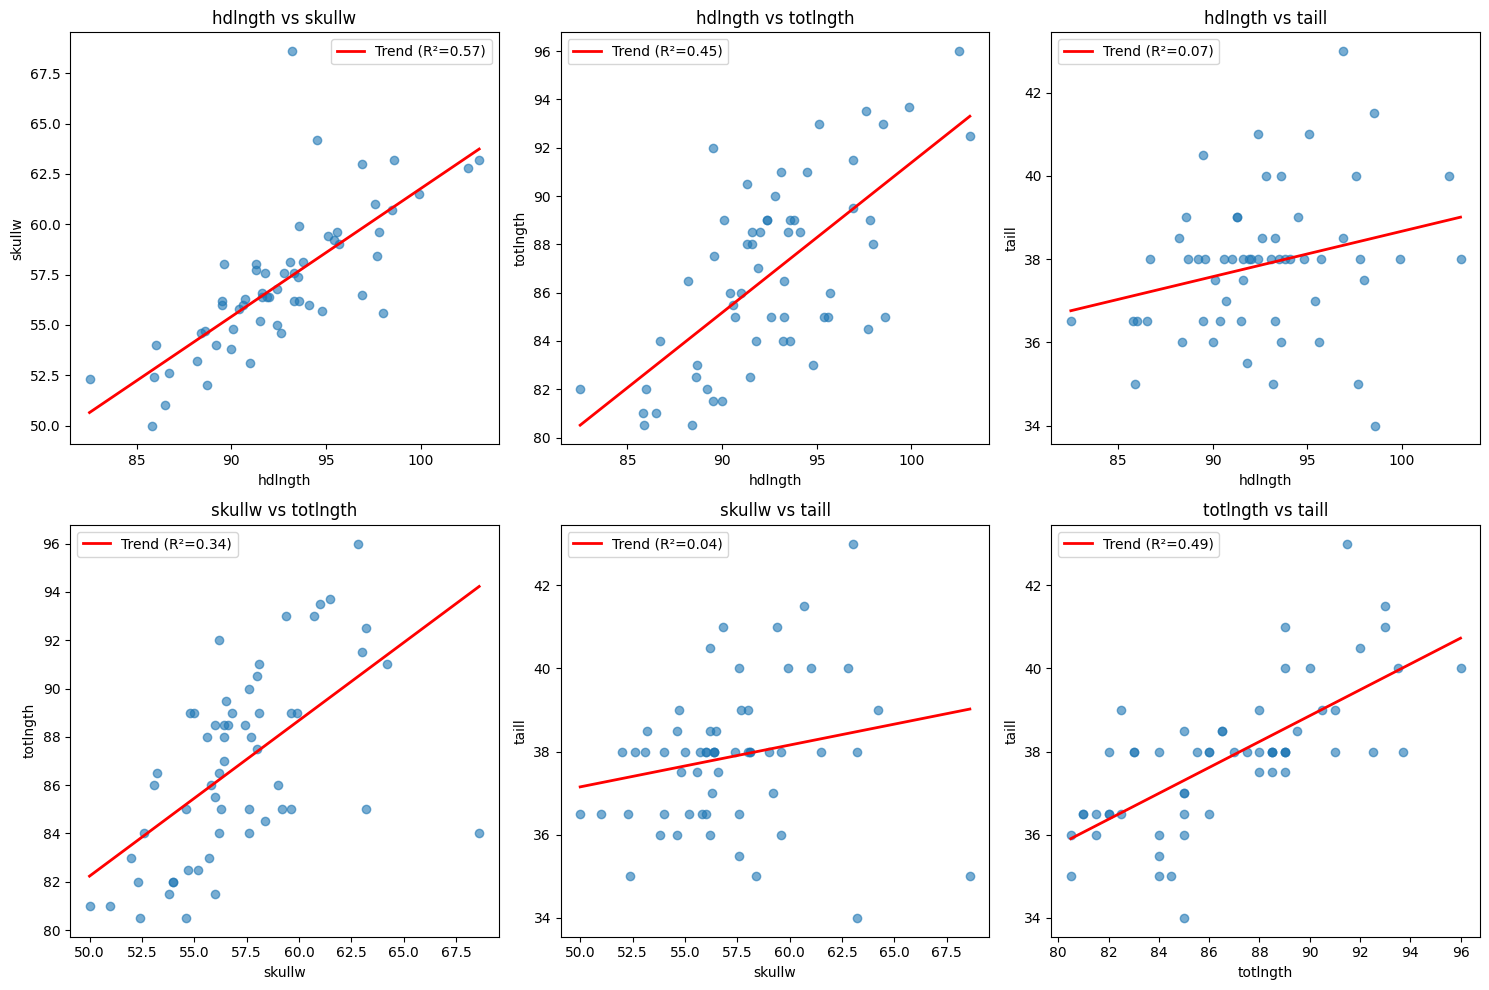

In [93]:
features = ['hdlngth', 'skullw', 'totlngth', 'taill']
pairs = list(combinations(features, 2))
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.flatten()

for i, (feature_x, feature_y) in enumerate(pairs):
    ax[i].scatter(other_pop[feature_x], other_pop[feature_y], alpha=0.6)
    
    # Add regression/trend line
    slope, intercept, r_value, _, _ = stats.linregress(other_pop[feature_x], other_pop[feature_y])
    line_x = np.linspace(other_pop[feature_x].min(), other_pop[feature_x].max(), 100)
    line_y = slope * line_x + intercept
    ax[i].plot(line_x, line_y, 'r-', linewidth=2, label=f'Trend (R²={r_value**2:.2f})')
    
    # # Mean lines
    # ax[i].axhline(female_pop[feature_y].mean(), color='green', linestyle='--', alpha=0.5, label='Mean Y')
    # ax[i].axvline(female_pop[feature_x].mean(), color='blue', linestyle='--', alpha=0.5, label='Mean X')
    
    ax[i].set_xlabel(feature_x)
    ax[i].set_ylabel(feature_y)
    ax[i].set_title(f'{feature_x} vs {feature_y}')
    ax[i].legend()

plt.tight_layout()
plt.show()

In [94]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [95]:
np.array(df.skullw)

array([60.4, 57.6, 60. , 57.1, 56.3, 54.8, 58.2, 57.6, 56.3, 58. , 57.2,
       55.6, 59.9, 57.6, 57.6, 56. , 67.7, 55.7, 55.4, 56.3, 58.1, 58.5,
       56.1, 54.9, 58.5, 59. , 54.5, 56.8, 56. , 54.4, 54.1, 56.7, 54.6,
       55.7, 57.9, 59.3, 54.8, 56. , 51.5, 55. , 54.1, 55.5, 51.5, 55.9,
       54.4, 54.8, 63.2, 59.2, 56.4, 59.6, 61. , 58.1, 63. , 63.2, 61.5,
       59.4, 64.2, 62.8, 57.7, 59. , 58. , 56.4, 56.5, 57.4, 55.8, 57.6,
       56. , 55.6, 56.4, 57.6, 52.4, 52.3, 52. , 58.1, 56.8, 56.2, 51. ,
       50. , 52.6, 56. , 54. , 53.8, 54.6, 56.2, 53.2, 60.7, 58. , 58.4,
       54.6, 59.6, 56.3, 54. , 57.6, 56.6, 55.7, 53.1, 68.6, 56.2, 56. ,
       54.7, 55. , 55.2, 59.9])

In [96]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [97]:
LabelEncoder =  LabelEncoder()

In [98]:
df.Pop = LabelEncoder.fit_transform(df.Pop)
df.sex = LabelEncoder.fit_transform(df.sex)

In [99]:
df.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [100]:
correlation_matrix = df.corr()
correlation_matrix

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,0.892309,0.226876,-0.127150,-0.173205,-0.083491,-0.269094,0.379698,-0.783009,-0.820262,-0.031651,-0.346307,-0.181322
Pop,0.892309,1.000000,0.185236,-0.079624,-0.011770,0.066728,-0.090004,0.491185,-0.793156,-0.926391,0.158988,-0.196161,-0.033361
sex,0.226876,0.185236,1.000000,-0.057327,0.094829,0.081008,-0.173177,-0.044259,-0.123820,-0.116586,0.199841,-0.140042,-0.100529
age,-0.127150,-0.079624,-0.057327,1.000000,0.321749,0.280254,0.258330,0.119109,0.125548,0.065772,0.230931,0.325912,0.352037
hdlngth,-0.173205,-0.011770,0.094829,0.321749,1.000000,0.716135,0.687857,0.286474,0.391605,0.102006,0.360158,0.635824,0.559314
skullw,-0.083491,0.066728,0.081008,0.280254,0.716135,1.000000,0.529102,0.256102,0.275059,0.000164,0.322742,0.629742,0.453388
totlngth,-0.269094,-0.090004,-0.173177,0.258330,0.687857,0.529102,1.000000,0.565915,0.444832,0.139885,0.257312,0.580455,0.516162
taill,0.379698,0.491185,-0.044259,0.119109,0.286474,0.256102,0.565915,1.000000,-0.126277,-0.397258,0.200924,0.175055,0.293486
footlgth,-0.783009,-0.793156,-0.123820,0.125548,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584
earconch,-0.820262,-0.926391,-0.116586,0.065772,0.102006,0.000164,0.139885,-0.397258,0.783050,1.000000,-0.153145,0.202874,0.053524


In [101]:
from src.correlation_matrix_heatmap_plot import plot_heatmap

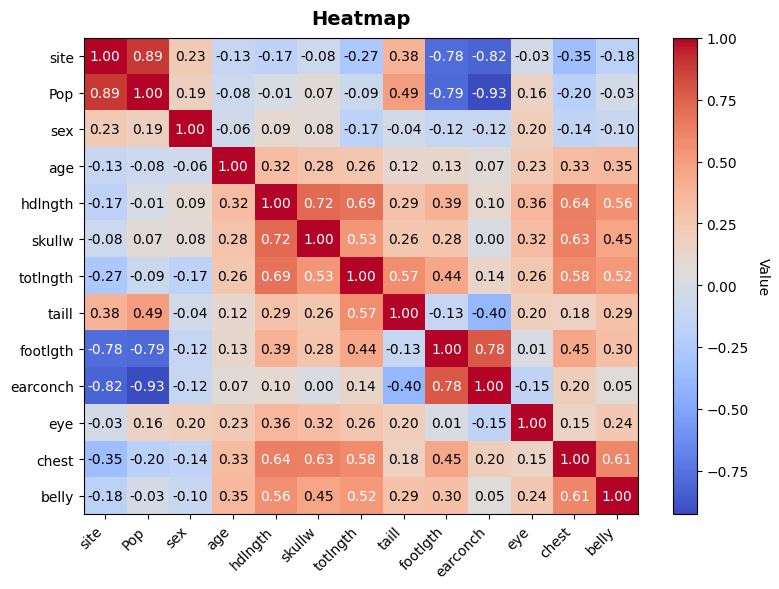

(<Figure size 800x600 with 2 Axes>, <Axes: title={'center': 'Heatmap'}>)

In [102]:
plot_heatmap(correlation_matrix)

**We can see that there is a correlatiob between Site and other features. we can sort this correlations from string to weak. we can clearly predict features such as earconch, footlgth, chest and Pop with good confident**

In [103]:
correlation_matrix.site.sort_values()

earconch   -0.820262
footlgth   -0.783009
chest      -0.346307
totlngth   -0.269094
belly      -0.181322
hdlngth    -0.173205
age        -0.127150
skullw     -0.083491
eye        -0.031651
sex         0.226876
taill       0.379698
Pop         0.892309
site        1.000000
Name: site, dtype: float64

**and also for the first question we can see that there is a linear trend between total lenght and head lenght.**

### **considering target value is age**

In [104]:
X = df.drop('age', axis= 1)
y = df.age

**scatter plot of features vs age<br>**
**we can clearly see that isnt a string linear correlation between age and other features**

In [105]:
correlation_matrix.age.sort_values() 

site       -0.127150
Pop        -0.079624
sex        -0.057327
earconch    0.065772
taill       0.119109
footlgth    0.125548
eye         0.230931
totlngth    0.258330
skullw      0.280254
hdlngth     0.321749
chest       0.325912
belly       0.352037
age         1.000000
Name: age, dtype: float64

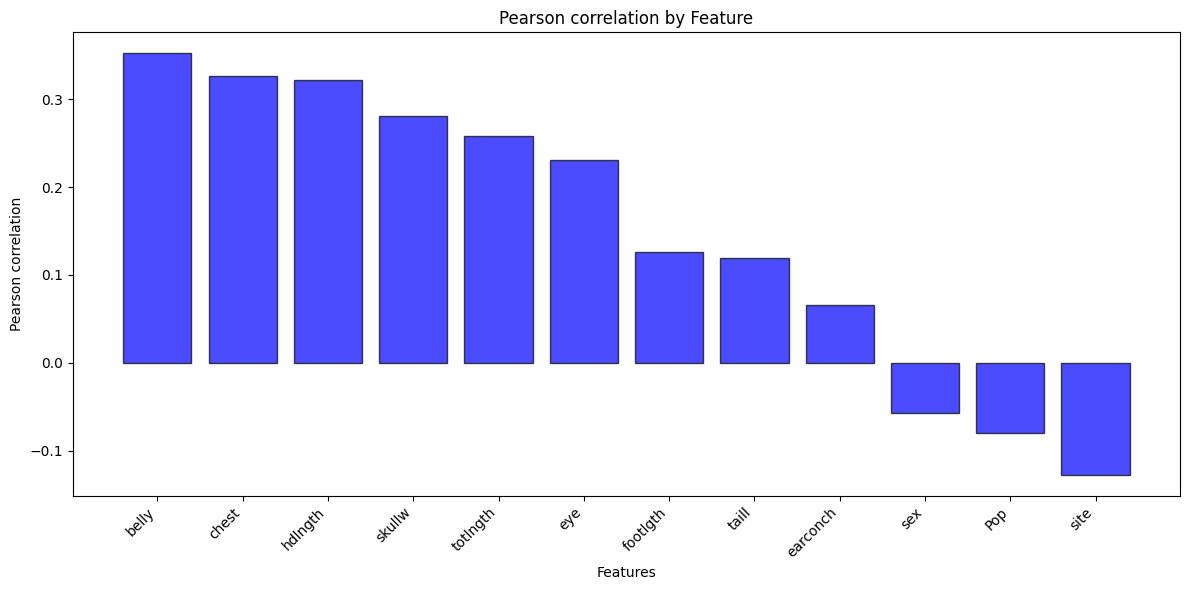

In [106]:
pearson_correaltion_result = pd.Series(correlation_matrix.age.sort_values() , index=X.columns, name='Mutual_Info')
mutual_info_sorted = pearson_correaltion_result.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(mutual_info_sorted.index, mutual_info_sorted.values, 
        color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Pearson correlation')
plt.title('Pearson correlation by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

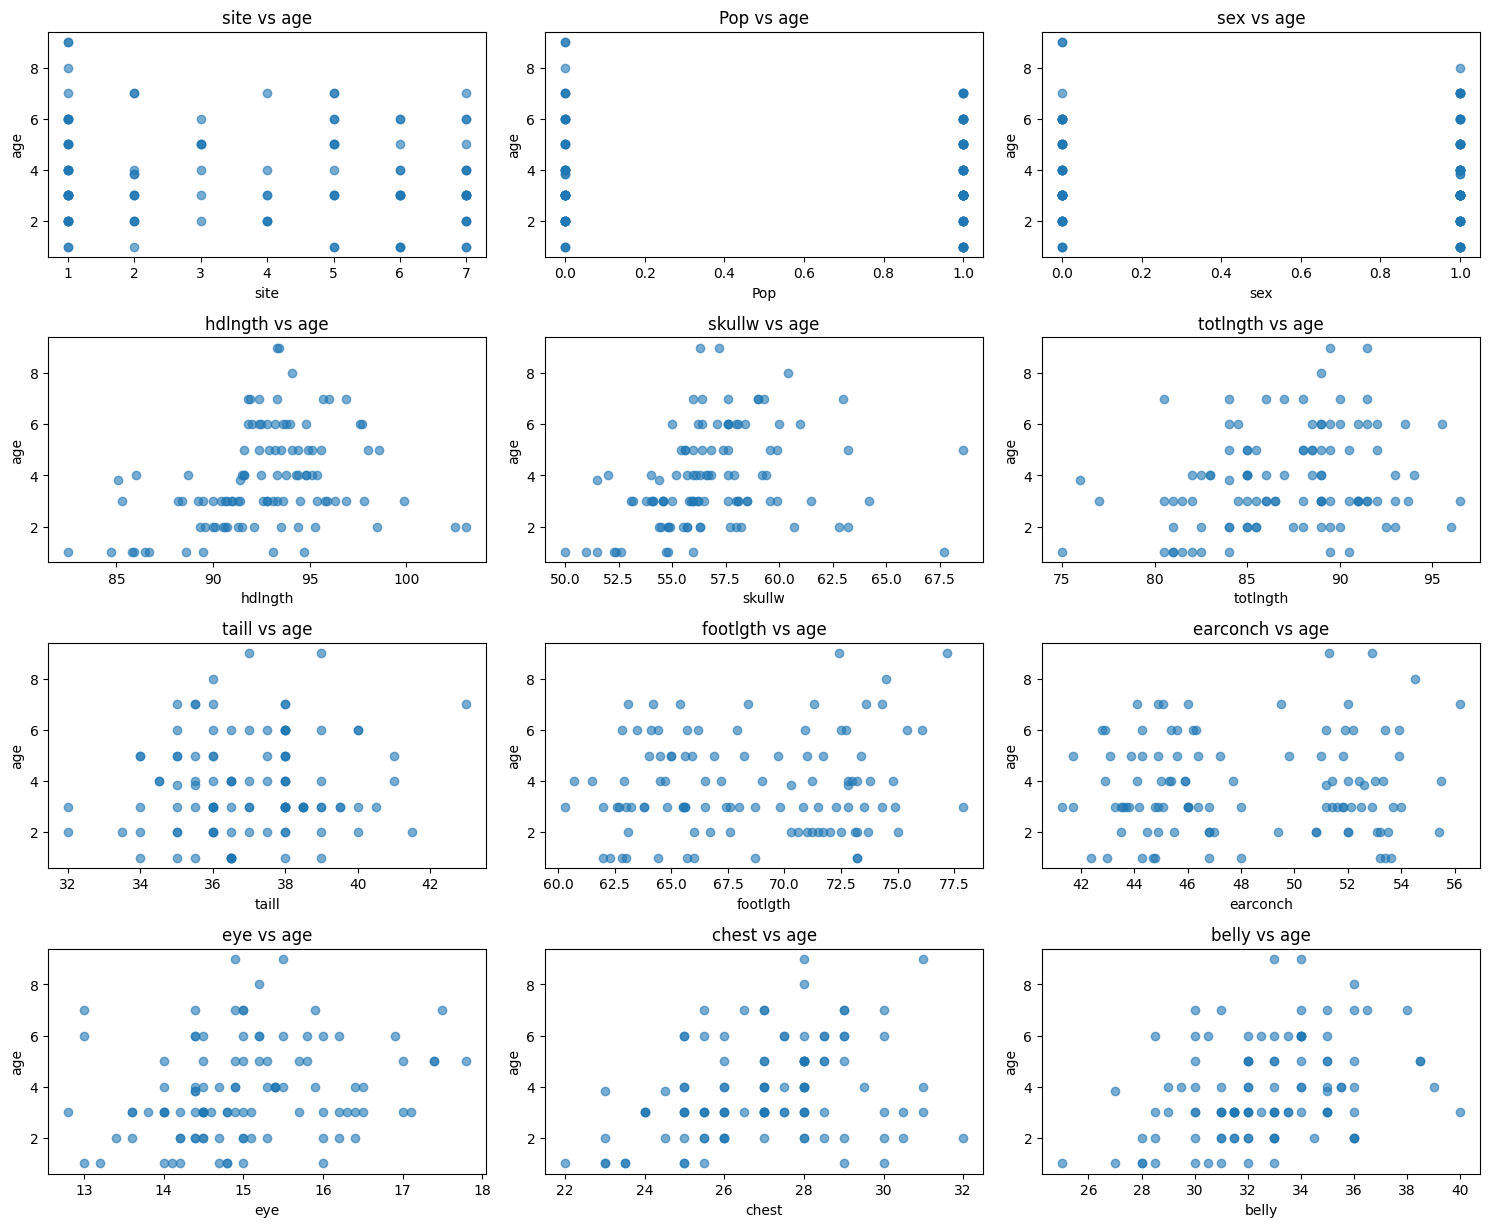

In [107]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15))
ax = axes.flatten()
feature_cols = [col for col in df.columns if col != 'age']

for i, feature in enumerate(feature_cols):
    ax[i].scatter(df[feature], df['age'], alpha=0.6)
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel('age')
    ax[i].set_title(f'{feature} vs age')
for i in range(len(feature_cols), len(ax)):
    ax[i].set_visible(False)

plt.tight_layout()
plt.show()

In [108]:
mutual_info = mutual_info_regression(X, y)

In [109]:
mutual_info

array([0.        , 0.02863423, 0.03622879, 0.27286377, 0.12651182,
       0.10642903, 0.        , 0.        , 0.        , 0.05550812,
       0.05790526, 0.01020057])

**there is a non linear relationship between age headlenght. this relationship is not string for other features**

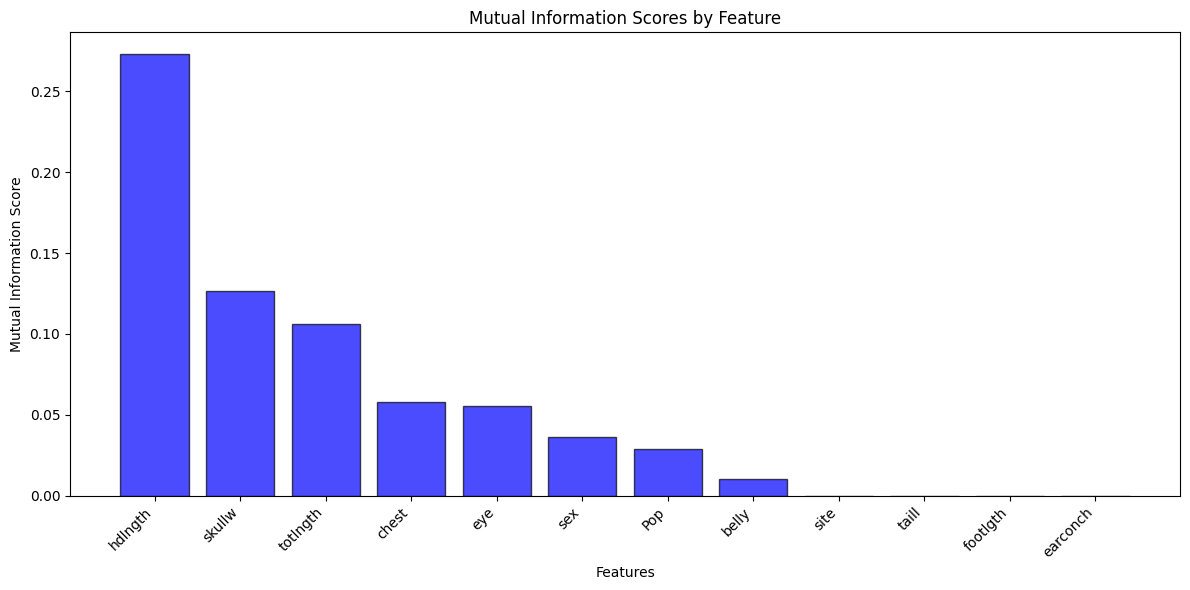

In [110]:
mutual_info_series = pd.Series(mutual_info, index=X.columns, name='Mutual_Info')
mutual_info_sorted = mutual_info_series.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.bar(mutual_info_sorted.index, mutual_info_sorted.values, 
        color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Simple modelling and analysis**

**we can observe that the linear relationship between features is weak and non liear models work better but for now lets use a linear regression model**

In [111]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [112]:
X.head()

,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,0,0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,0,0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,0,0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,0,0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


since we are using a linear model we scal y as well

In [113]:
X_scaled = X.copy()

In [114]:
y_scaled = y.copy()

In [115]:
# Select float columns, scale them, and assign back
float_cols = X_scaled.select_dtypes(include='float').columns
X_scaled[float_cols] = std_scaler.fit_transform(X_scaled[float_cols])

In [116]:
y_scaled = std_scaler.fit_transform(y.values.reshape(-1, 1))

In [117]:
X_scaled

,site,Pop,sex,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,0,1,0.410340,1.129784,0.436175,-0.517933,1.381091,1.559431,0.154863,0.488855,1.232005
1,1,0,0,-0.040487,0.230447,1.018722,-0.262684,0.923835,0.741704,0.918975,0.733282,0.142765
2,1,0,0,0.382163,1.001308,1.950797,1.013563,1.586856,0.915161,0.441405,1.466565,0.505845
3,1,0,0,0.156750,0.069851,1.135231,0.503064,1.746896,0.989500,0.154863,0.488855,0.505845
4,1,0,0,-0.322253,-0.187102,-0.379391,-0.517933,0.580893,1.237296,0.059349,0.733282,0.142765
...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,1,1,-0.885787,-0.283460,-1.311466,-0.262684,-0.562247,-0.348599,-0.227194,-1.955420,-2.035717
100,7,1,1,-1.139376,-0.701009,-1.078447,1.013563,-0.928052,-0.051243,-0.991306,-0.977710,0.142765
101,7,1,0,-0.068664,-0.604651,0.436175,0.503064,-1.133817,-0.695513,-1.946446,-0.977710,-0.946476
102,7,1,1,-0.322253,-0.540413,-1.078447,-0.262684,-1.270994,-0.571615,0.345891,-0.977710,-1.309557


In [118]:
lr = LinearRegression()

In [119]:
scores = cross_val_score(
    lr, X, y, scoring='neg_mean_absolute_error', cv=5)

In [120]:
scores = np.array([-2.12849853, -2.26501191, -1.69445374, -1.28598937, -1.54699262])

# Convert to actual MAE (positive values)
mae_scores = -scores
print(f"MAE scores: {mae_scores}")
# Output: [2.12849853, 2.26501191, 1.69445374, 1.28598937, 1.54699262]

# Get the average performance
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

print(f"Mean MAE: {mean_mae:.4f}")
print(f"Std MAE: {std_mae:.4f}")

MAE scores: [2.12849853 2.26501191 1.69445374 1.28598937 1.54699262]
Mean MAE: 1.7842
Std MAE: 0.3639


In [121]:
scores = cross_val_score(
    lr, X_scaled, y_scaled, scoring='neg_mean_absolute_error', cv=5)

In [122]:
scores

array([-1.11464912, -0.84027197, -0.94626829, -0.63675432, -0.7619655 ])

In [123]:
scores = np.array([-1.11464912, -0.84027197, -0.94626829, -0.63675432, -0.7619655 ])
mae_scores = -scores
print(f"MAE scores: {mae_scores}")
# Output: [2.12849853, 2.26501191, 1.69445374, 1.28598937, 1.54699262]

# Get the average performance
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

print(f"Mean MAE: {mean_mae:.4f}")
print(f"Std MAE: {std_mae:.4f}")

MAE scores: [1.11464912 0.84027197 0.94626829 0.63675432 0.7619655 ]
Mean MAE: 0.8600
Std MAE: 0.1626


In [124]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
ridge_model = Ridge(alpha=2.5)

In [139]:
from sklearn.model_selection import GridSearchCV

In [142]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]}
ridge = Ridge()
grid_search = GridSearchCV(ridge_model, param_grid, 
                          scoring='neg_mean_absolute_error',
                          cv=5, 
                          return_train_score=True)
grid_search.fit(X_scaled, y_scaled)
print(f"Best alpha: {grid_search.best_params_['alpha']}")
print(f"Best CV score (MAE): {-grid_search.best_score_:.4f}")

Best alpha: 100.0
Best CV score (MAE): 0.8213


Interpretation of high alpha<br>

High multicollinearity (features are highly correlated)<br>
Many noisy or irrelevant features<br>
Risk of severe overfitting without strong constraints<br>

In [137]:
ridge_scores = cross_val_score(ridge_model,X_scaled , y_scaled, scoring='neg_mean_absolute_error', cv=5)

In [138]:
ridge_scores = np.array([-1.11286946, -0.77452937, -0.97581049, -0.66129189, -0.70175428])
mae_scores = -ridge_scores
print(f"MAE scores: {mae_scores}")
# Output: [2.12849853, 2.26501191, 1.69445374, 1.28598937, 1.54699262]

# Get the average performance
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

print(f"Mean MAE: {mean_mae:.4f}")
print(f"Std MAE: {std_mae:.4f}")

MAE scores: [1.11286946 0.77452937 0.97581049 0.66129189 0.70175428]
Mean MAE: 0.8453
Std MAE: 0.1721


In [130]:
lass_model = Lasso(alpha=.2)

In [131]:
lasso_scores = cross_val_score(lass_model,X_scaled , y_scaled, scoring='neg_mean_absolute_error', cv=5)

In [134]:
lasso_scores

array([-1.11041337, -0.83112362, -0.73680483, -0.82168822, -0.71755965])

In [135]:
lasso_scores = np.array([-1.11041337, -0.83112362, -0.73680483, -0.82168822, -0.71755965])
mae_scores = -ridge_scores
print(f"MAE scores: {mae_scores}")
# Output: [2.12849853, 2.26501191, 1.69445374, 1.28598937, 1.54699262]

# Get the average performance
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

print(f"Mean MAE: {mean_mae:.4f}")
print(f"Std MAE: {std_mae:.4f}")

MAE scores: [1.11286946 0.77452937 0.97581049 0.66129189 0.70175428]
Mean MAE: 0.8453
Std MAE: 0.1721


In [128]:
raise KeyError('fdfdf')

KeyError: 'fdfdf'

**normalising some of the data**

In [ ]:
from scipy.stats import normaltest, boxcox

In [ ]:
normal_test_features = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth','earconch', 'eye', 'chest', 'belly']
for i , val in enumerate(normal_test_features):
    print(f'{val} normal test is equale to {normaltest(X_labeld[val]).pvalue}')

hdlngth normal test is equale to 0.2119590756440955
skullw normal test is equale to 0.23465314007408547
totlngth normal test is equale to 0.42403766036563406
taill normal test is equale to 0.5253998798536322
footlgth normal test is equale to 2.6439511517378627e-08
earconch normal test is equale to 1.6054250432370557e-23
eye normal test is equale to 0.20784850421296983
chest normal test is equale to 0.8101776030495327
belly normal test is equale to 0.8361680686001689


In [ ]:
X_labeld.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 103
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   site       103 non-null    int64  
 1   hdlngth    103 non-null    float64
 2   skullw     103 non-null    float64
 3   totlngth   103 non-null    float64
 4   taill      103 non-null    float64
 5   footlgth   103 non-null    float64
 6   earconch   103 non-null    float64
 7   eye        103 non-null    float64
 8   chest      103 non-null    float64
 9   belly      103 non-null    float64
 10  Pop_Vic    103 non-null    bool   
 11  Pop_other  103 non-null    bool   
 12  sex_f      103 non-null    bool   
 13  sex_m      103 non-null    bool   
dtypes: bool(4), float64(9), int64(1)
memory usage: 9.3 KB


In [ ]:
# Convert booleans to integers
X_labeld['Pop_Vic'] = X_labeld['Pop_Vic'].astype(int)
X_labeld['Pop_other'] = X_labeld['Pop_other'].astype(int)
X_labeld['sex_f'] = X_labeld['sex_f'].astype(int)
X_labeld['sex_m'] = X_labeld['sex_m'].astype(int)

In [ ]:
dest_features = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth','earconch', 'eye', 'chest', 'belly']
def dest_plot(n, m , dataset):
    fig, axes = plt.subplots(n, m, figsize=(10, 15))
    ax = axes.flatten()
    # Plot each feature against target
    for i, feature in enumerate(dataset[dest_features]):
        ax[i].hist(df[feature], edgecolor='black', bins = 20)
        ax[i].set_xlabel(feature, color = 'red')
        ax[i].set_ylabel('ranges')
        ax[i].set_title(f'{feature} Boxplot')

    # Hide any empty subplots
    for i in range(len(dataset[dest_features]), len(ax)):
        ax[i].set_visible(False)

    plt.tight_layout()
    plt.show()


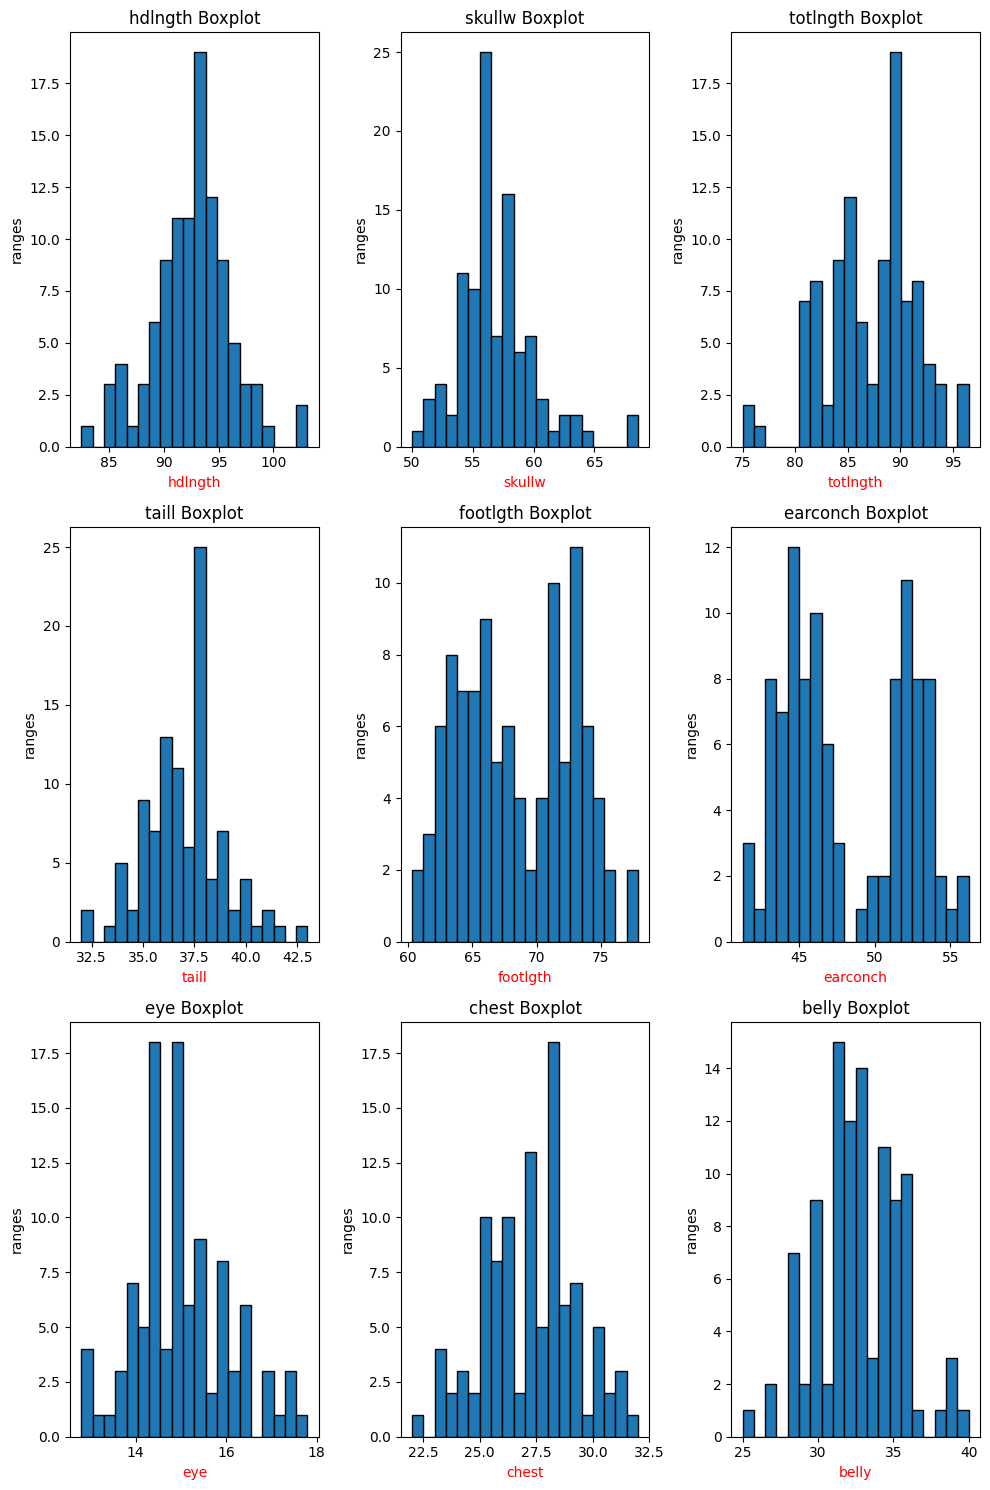

In [ ]:
dest_plot(3, 3, X_labeld)

In [ ]:
dest_features = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth','earconch', 'eye', 'chest', 'belly']
def dest_plot_log(n, m, dataset):
    fig, axes = plt.subplots(n, m, figsize=(10, 15))
    ax = axes.flatten()
    
    for i, feature in enumerate(dataset[dest_features]):
        ax[i].hist(df[feature], edgecolor='black', bins=20)
        ax[i].set_xlabel(feature, color='red')
        ax[i].set_ylabel('ranges')
        ax[i].set_title(f'{feature} Boxplot')
        ax[i].set_yscale('log')  # Log scale on Y-axis
    
    for i in range(len(dataset[dest_features]), len(ax)):
        ax[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

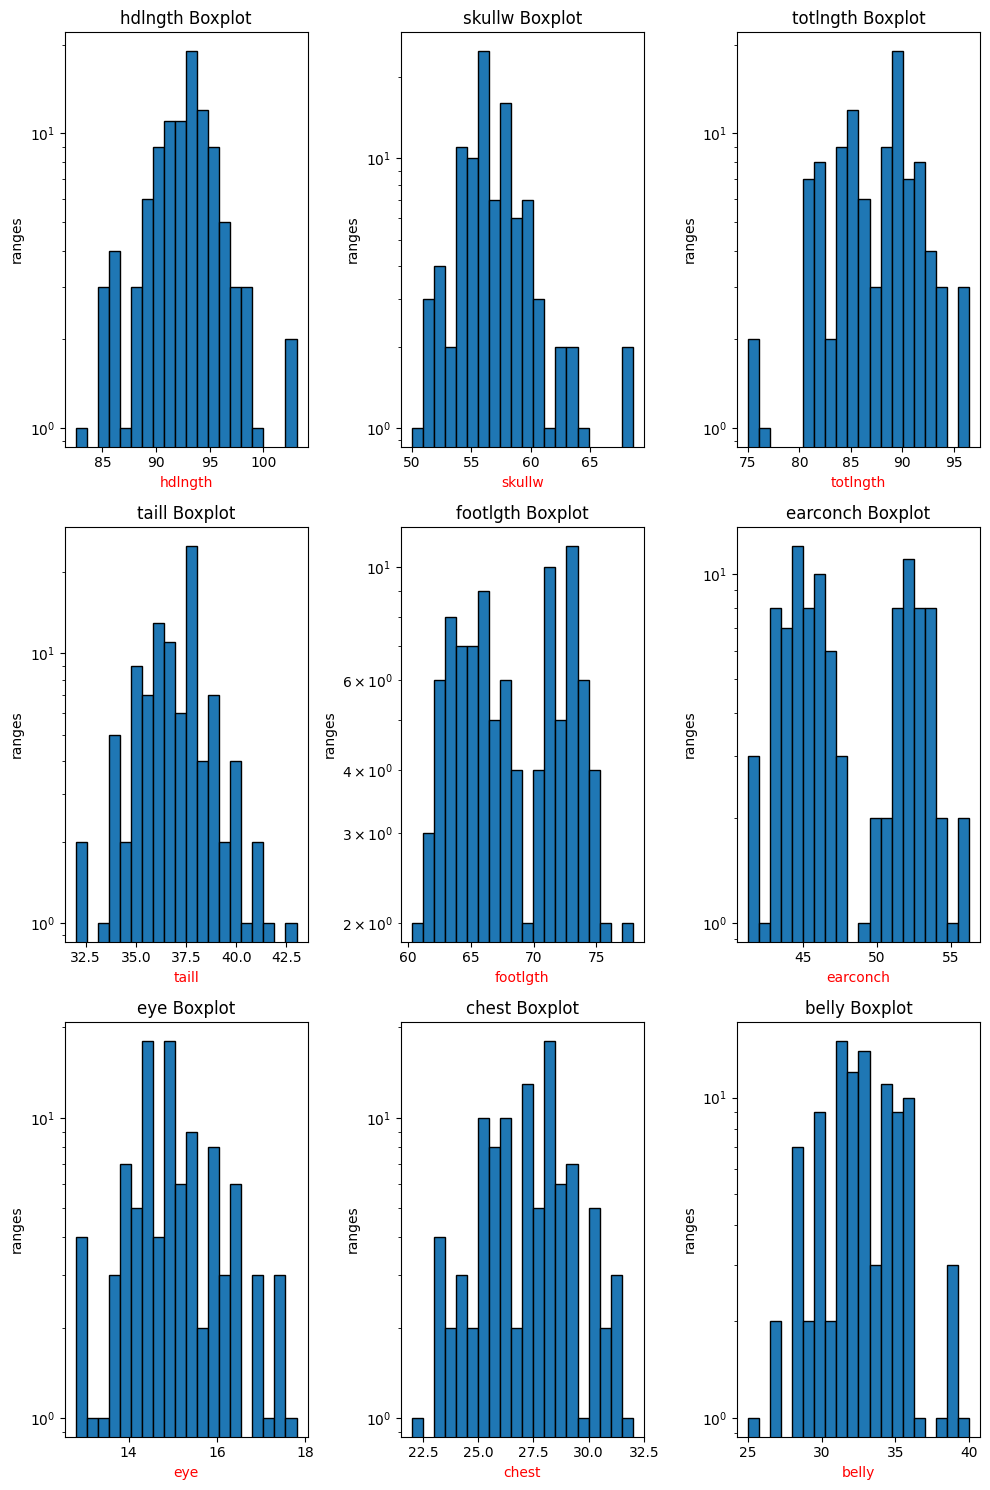

In [ ]:
dest_plot_log(3, 3, X_labeld)

In [ ]:
X.columns

Index(['site', 'Pop', 'sex', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [ ]:
X_labeld.skullw = boxcox(X_labeld.skullw)[0]

In [ ]:
scores_2 = cross_val_score(
    lr, X_labeld, y, scoring='neg_mean_absolute_error', cv=5)

In [ ]:
scores = np.array([-2.12849853, -2.26501191, -1.69445374, -1.28598937, -1.54699262])
mae_scores = -scores
print(f"MAE scores: {mae_scores}")
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()
print(f"Mean MAE: {mean_mae:.4f}")
print(f"Std MAE: {std_mae:.4f}")

MAE scores: [2.12849853 2.26501191 1.69445374 1.28598937 1.54699262]
Mean MAE: 1.7842
Std MAE: 0.3639


In [ ]:
scores_2 = np.array([-2.12557357, -2.26337081, -1.69472629, -1.29262749, -1.54345071])
mae_scores = -scores
print(f"MAE scores: {mae_scores}")
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()
print(f"Mean MAE: {mean_mae:.4f}")
print(f"Std MAE: {std_mae:.4f}")

MAE scores: [2.12849853 2.26501191 1.69445374 1.28598937 1.54699262]
Mean MAE: 1.7842
Std MAE: 0.3639


In [ ]:
X_labeld

,site,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_Vic,Pop_other,sex_f,sex_m
0,1,94.1,0.301051,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0,0,1
1,1,92.5,0.301051,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1,0,1,0
2,1,94.0,0.301051,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1,0,1,0
3,1,93.2,0.301051,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1,0,1,0
4,1,91.5,0.301051,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,7,89.5,0.301051,81.5,36.5,66.0,46.8,14.8,23.0,27.0,0,1,0,1
100,7,88.6,0.301051,82.5,39.0,64.4,48.0,14.0,25.0,33.0,0,1,0,1
101,7,92.4,0.301051,89.0,38.0,63.5,45.4,13.0,25.0,30.0,0,1,1,0
102,7,91.5,0.301051,82.5,36.5,62.9,45.9,15.4,25.0,29.0,0,1,0,1


In [ ]:
lr.fit(X_labeld, y)
perm_importance = permutation_importance(lr, X_labeld, y, n_repeats=10, random_state=42, n_jobs=-1)

545.48s - Error patching args (debugger not attached to subprocess).
Traceback (most recent call last):
  File "/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 541, in patch_args
    new_args.append(_get_python_c_args(host, port, code, unquoted_args, SetupHolder.setup))
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/majid/Desktop/WebDev/machine-learning-projects/lib/python3.11/site-packages/debugpy/_vendored/pydevd/_pydev_bundle/pydev_monkey.py", line 193, in _get_python_c_args
    if "__future__" in code:
       ^^^^^^^^^^^^^^^^^^^^
TypeError: a bytes-like object is required, not 'str'
0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_

In [ ]:
perm_importance.importances_mean

array([9.03456100e-02, 7.15307250e-02, 9.07423611e-02, 1.20085943e-02,
       8.17596844e-02, 3.82569708e-01, 7.46034185e-02, 4.58913058e-02,
       1.41630989e-02, 7.27857913e-02, 3.10740533e-01, 3.07099194e-01,
       5.13027008e-04, 3.49680962e-04])

In [ ]:
feature_names = [i for i in ['site','Pop_Vic','Pop_other','sex_f','sex_m','hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly']]

In [ ]:
linear_reg_importances = pd.Series(perm_importance.importances_mean, index=feature_names, name='Mutual_Info')

In [ ]:
linear_reg_importances

site         0.090346
Pop_Vic      0.071531
Pop_other    0.090742
sex_f        0.012009
sex_m        0.081760
hdlngth      0.382570
skullw       0.074603
totlngth     0.045891
taill        0.014163
footlgth     0.072786
earconch     0.310741
eye          0.307099
chest        0.000513
belly        0.000350
Name: Mutual_Info, dtype: float64

In [ ]:
dtr_importances = linear_reg_importances.sort_values(ascending=False)
dtr_importances.index

Index(['hdlngth', 'earconch', 'eye', 'Pop_other', 'site', 'sex_m', 'skullw',
       'footlgth', 'Pop_Vic', 'totlngth', 'taill', 'sex_f', 'chest', 'belly'],
      dtype='object')

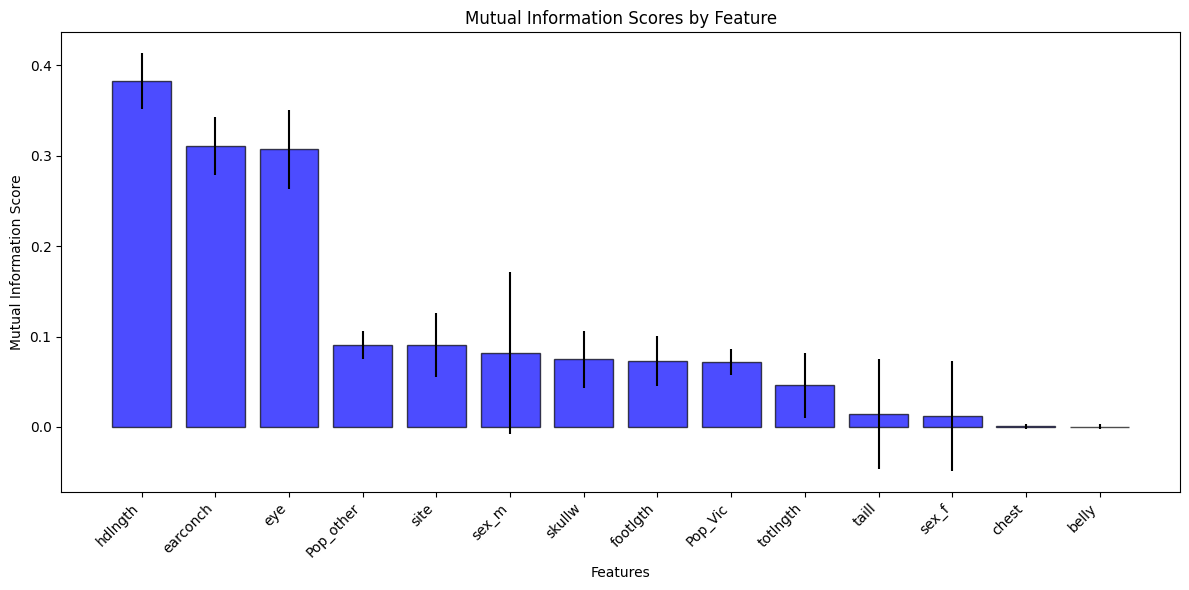

In [ ]:
# Sort for better visualization
dtr_importances = linear_reg_importances.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(dtr_importances.index, dtr_importances.values, 
        color='blue', edgecolor='black', alpha=0.7, yerr=perm_importance.importances_std)
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Scores by Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbt = GradientBoostingRegressor()

In [ ]:
scores = cross_val_score(gbt, X_labeld, y, cv=5, scoring='neg_mean_absolute_error')

In [ ]:
scores

array([-2.20099128, -1.60014104, -1.26127436, -1.32801442, -1.51917869])

In [ ]:
scores = np.array([-2.26738895, -1.4922026 , -1.30991233, -1.4543261 , -1.56943651])

# Convert to actual MAE (positive values)
mae_scores = -scores
print(f"MAE scores: {mae_scores}")
# Output: [2.12849853, 2.26501191, 1.69445374, 1.28598937, 1.54699262]

# Get the average performance
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

print(f"Mean MAE: {mean_mae:.4f}")
print(f"Std MAE: {std_mae:.4f}")

MAE scores: [2.26738895 1.4922026  1.30991233 1.4543261  1.56943651]
Mean MAE: 1.6187
Std MAE: 0.3351
